M0 and M1 issues
Change number of components to see the effect
There should only be one eigenvalue, not two
Alpha vectors should only be two values

\begin{align}
H_\alpha\phi(x)\equiv \bigg(-\frac{d^2}{dx^2}+\alpha x^2\bigg)\phi(x)=\lambda\phi(x),\quad \langle\phi|\phi\rangle=1,
\end{align}

\begin{align}
T\phi(x)=-\frac{d^2}{dx^2}\phi(x),\quad V_\alpha(x)\phi(x)=\alpha x^2\phi(x),\quad H_\alpha(x)=T+V(x).
\end{align}


\begin{align}
\bigg(-\frac{d^2}{dx^2}+\alpha x^2-\lambda\bigg)\phi(x)\equiv F_\alpha(\phi(x))=0,
\end{align}


\begin{align}
F_\alpha(\phi(x))=0,\quad\langle\phi|\phi\rangle=1.
\end{align}

\begin{align}
	\hat{\phi}_{\alpha_{k}}(x) = \sum_{i=1}^{n} a_{i} \phi_{i}(x) .
\end{align}

Because we are solving an eigenvalue problem, we can arrive at a set of different-looking equations, using the same set of judges $\{\psi_i(x)\}_{i=1}^n$ as before. We can simply plug $\hat{\phi}_{\alpha_k}$ into the Schrodinger equation and project both sides onto the judges, writing

\begin{align}
\sum_{i=1}^na_i\langle \psi_j|H_{\alpha_k}|\phi_i\rangle=\lambda\sum_{i=1}^na_i\langle\psi_j|\phi_i\rangle.
\end{align}

Define now two matrices:

\begin{align}
M_{ij}(\alpha)\equiv \langle\psi_j|H_\alpha|\phi_i\rangle,\quad N_{ij}\equiv\langle\psi_j|\phi_i\rangle.
\end{align}

These are both $n\times n$ matrices, and we now have a generalized eigenvalue problem for $\vec{a}$:

\begin{align}
M(\alpha)\vec{a}=\lambda N\vec{a}.
\end{align}

Situationally, this may be quicker to solve than finding the roots of the nonlinear system that results from the "traditional" RBM approach.

As with traditional RBM approaches, this is only helpful if we can evaluate $M(\alpha)$ quickly for different $\alpha$ values. For the HO, this is not too hard: we can write

\begin{align}
\langle\psi_j|H_\alpha|\phi_i\rangle=\langle\psi_j|T|\phi_i\rangle+\alpha\langle \psi_j|x^2|\phi_i\rangle\equiv M_{ij}^{(0)}+\alpha M_{ij}^{(1)}.
\end{align}

Our eigenvalue equation is then

\begin{align}
[M^{(0)}+\alpha M^{(1)}]\vec{a}=\lambda N\vec{a},
\end{align}

and all of $M^{(0)},M^{(1)}$ and $N$ can be precomputed.

In [1]:
import numpy as np
from scipy import linalg
import scipy
import matplotlib.pyplot as plt
import time as ti

In [2]:
alphas =  [.5,2,5,7,10,15]
x_max = 10.0
h = 10**(-2)
x = np.arange(-x_max, x_max + h, h)
m = np.zeros((len(alphas), x.shape[0]))

In [3]:
# Second Derivative
# Potential Matrix

def second_derivative_matrix(xgrid):
    size = len(xgrid)
    offDiag = np.zeros(size)
    offDiag[1] = 1
        
    H = -1*(-2*np.identity(size) + scipy.linalg.toeplitz(offDiag))/h**2
    return H
        

def potential_matrix(xgrid):
    return np.diag(xgrid**2)

def H_creator(alpha, xgrid):
    d2 = second_derivative_matrix(xgrid)
    pot = potential_matrix(xgrid)
    H = d2 + alpha*pot
    return H

def hf_solve(H):
    evals, evects = np.linalg.eigh(H)
    return evals, evects


In [4]:
alphas =  [.5,2,5,7,10,15]
for i,alpha in enumerate(alphas):
    alpha = alphas[i]
    H = H_creator(alpha, x)
    evals, evects = hf_solve(H)
    print(evects)
    # m[i] = evects[0] / np.linalg.norm(evects[0])*np.sign(evects[0][  int(len(x)/2)  ])
    m[i] = evects[:,0] 

[[ 4.00124646e-18 -4.70187724e-17 -3.86308572e-16 ... -2.94401912e-03
   3.04336954e-03  0.00000000e+00]
 [ 8.02148928e-18 -9.45805592e-17 -7.74420299e-16 ...  5.88277628e-03
  -6.08356317e-03  0.00000000e+00]
 [ 1.20828679e-17 -1.41994446e-16 -1.16611369e-15 ... -8.81107772e-03
   9.11746907e-03  0.00000000e+00]
 ...
 [ 1.20833213e-17  1.41503908e-16 -1.16611035e-15 ...  0.00000000e+00
   0.00000000e+00  9.11746907e-03]
 [ 8.02284198e-18  9.39725880e-17 -7.74418462e-16 ...  0.00000000e+00
   0.00000000e+00 -6.08356317e-03]
 [ 4.00151563e-18  4.68950659e-17 -3.86309226e-16 ...  0.00000000e+00
   0.00000000e+00  3.04336954e-03]]
[[-1.66909538e-21 -4.08481639e-19 -6.01567100e-21 ... -6.05916518e-03
   0.00000000e+00  6.17781173e-03]
 [-2.79628406e-21 -6.84587910e-19 -1.00841588e-20 ...  1.20905388e-02
   0.00000000e+00 -1.23392798e-02]
 [-3.05865541e-21 -7.50735889e-19 -1.08842493e-20 ... -1.80669401e-02
   0.00000000e+00  1.84685970e-02]
 ...
 [ 1.27659818e-21  2.48193888e-19  4.0426384

In [5]:
m

array([[ 4.00124646e-18,  8.02148928e-18,  1.20828679e-17, ...,
         1.20833213e-17,  8.02284198e-18,  4.00151563e-18],
       [-1.66909538e-21, -2.79628406e-21, -3.05865541e-21, ...,
         1.27659818e-21,  4.60326011e-22,  5.16160702e-22],
       [ 1.49347460e-21,  3.21504425e-21,  1.37828970e-21, ...,
        -2.19606113e-21, -1.98874899e-21, -1.09529053e-21],
       [-9.46915006e-22, -1.64402147e-21, -2.23007893e-21, ...,
         2.24227985e-21,  1.69944257e-21, -7.56249875e-22],
       [-4.23102883e-22,  7.03930701e-22,  1.92112697e-22, ...,
        -5.50623115e-21, -3.81475019e-21, -2.54854347e-21],
       [-1.66263303e-22, -1.74493750e-21, -4.40928626e-21, ...,
         4.18801544e-21,  3.46547318e-21,  6.52231913e-22]])

In [6]:
U, sigma, Vh = np.linalg.svd(m)
#components = 3
components = len(m)
print(components)
reduced_basis = Vh[:components]

# reduced_basis = [reduced_basis[i]*np.sign(reduced_basis[i][  int(len(x)/2)  ]) for i in range(len(reduced_basis))]

6


In [7]:
psi = np.array(reduced_basis)
phi = np.array(reduced_basis)
#psi = m
#phi = m
print(m)

[[ 4.00124646e-18  8.02148928e-18  1.20828679e-17 ...  1.20833213e-17
   8.02284198e-18  4.00151563e-18]
 [-1.66909538e-21 -2.79628406e-21 -3.05865541e-21 ...  1.27659818e-21
   4.60326011e-22  5.16160702e-22]
 [ 1.49347460e-21  3.21504425e-21  1.37828970e-21 ... -2.19606113e-21
  -1.98874899e-21 -1.09529053e-21]
 [-9.46915006e-22 -1.64402147e-21 -2.23007893e-21 ...  2.24227985e-21
   1.69944257e-21 -7.56249875e-22]
 [-4.23102883e-22  7.03930701e-22  1.92112697e-22 ... -5.50623115e-21
  -3.81475019e-21 -2.54854347e-21]
 [-1.66263303e-22 -1.74493750e-21 -4.40928626e-21 ...  4.18801544e-21
   3.46547318e-21  6.52231913e-22]]


In [8]:
d2 = second_derivative_matrix(x)
pot = potential_matrix(x)

In [9]:
# def M0(psi, phi, d2, i, j):
#     inner_product = np.dot(psi[j], phi[i])
#     result_vector = np.dot(d2, psi[j])
#     M0 = np.dot(result_vector, phi[i])
#     return M0

def M0(psi, phi, d2, i, j):
    M0 = np.dot(psi[j], np.dot(d2, phi[i]))
    return M0

In [10]:
# def M1(psi, phi, pot, i, j):
#     inner_product = np.dot(psi[j], phi[i])
#     result_vector = np.dot(pot, psi[j])
#     M1 = np.dot(result_vector, phi[i])
#     return M1

def M1(psi, phi, pot, i, j):
    M1 = np.dot(psi[j], np.dot(pot, phi[i]))
    return M1

In [11]:
compvec = np.zeros(components)
array = []
for i in range(components):
    array.append(compvec)
H_hat = np.array(array)
M1 = np.array(array)
M2 = np.array(array)
print(len(H_hat))
N = np.array(array)


6


[ ⟨𝜓₀|d2|𝜙₀⟩ + α⟨𝜓₁|pot|𝜙₀⟩   ⟨𝜓₁|d2|𝜙₀⟩ + α⟨𝜓₁|pot|𝜙₀⟩   ⟨𝜓₂|d2|𝜙₀⟩ + α⟨𝜓₂|pot|𝜙₀⟩ ]
[ ⟨𝜓₀|d2|𝜙₁⟩ + α⟨𝜓₀|pot|𝜙₁⟩   ⟨𝜓₁|d2|𝜙₁⟩ + α⟨𝜓₁|pot|𝜙₁⟩   ⟨𝜓₂|d2|𝜙₁⟩ + α⟨𝜓₂|pot|𝜙₁⟩ ]
[ ⟨𝜓₀|d2|𝜙₂⟩ + α⟨𝜓₀|pot|𝜙₂⟩   ⟨𝜓₁|d2|𝜙₂⟩ + α⟨𝜓₁|pot|𝜙₂⟩   ⟨𝜓₂|d2|𝜙₂⟩ + α⟨𝜓₂|pot|𝜙₂⟩ ]

\begin{align}
\sum_{i=1}^na_i\langle \psi_j|H_{\alpha_k}|\phi_i\rangle=\lambda\sum_{i=1}^na_i\langle\psi_j|\phi_i\rangle.
\end{align}

Define now two matrices:

\begin{align}
M_{ij}(\alpha)\equiv \langle\psi_j|H_\alpha|\phi_i\rangle,\quad N_{ij}\equiv\langle\psi_j|\phi_i\rangle.
\end{align}


\begin{align}
\langle\psi_j|H_\alpha|\phi_i\rangle=\langle\psi_j|T|\phi_i\rangle+\alpha\langle \psi_j|x^2|\phi_i\rangle\equiv M_{ij}^{(0)}+\alpha M_{ij}^{(1)}.
\end{align}


In [12]:
def create_H_hat(alpha, phi, psi, pot, d2):
    for i in range(components):
        for j in range(len(H_hat[i])):
            H_hat[i][j] = M0(psi, phi, d2, i, j) + alpha*M1(psi,phi,pot,i,j)
    return H_hat

In [13]:
def create_H_hat(alpha, phi, psi, pot, d2):
    for i in range(components):
        for j in range(i, components):
            M1[i][j] = phi[i] @ d2 @ psi[j]
            M1[j][i] = M1[i][j]
            M2[i][j] = phi[i] @ pot @ psi[j]
            M2[j][i] = M2[i][j]
    H_hat = M1 + alpha*M2
    return H_hat


In [14]:
print(d2)

[[ 20000. -10000.     -0. ...     -0.     -0.     -0.]
 [-10000.  20000. -10000. ...     -0.     -0.     -0.]
 [    -0. -10000.  20000. ...     -0.     -0.     -0.]
 ...
 [    -0.     -0.     -0. ...  20000. -10000.     -0.]
 [    -0.     -0.     -0. ... -10000.  20000. -10000.]
 [    -0.     -0.     -0. ...     -0. -10000.  20000.]]


In [15]:
H_hat = create_H_hat(5, phi, psi, pot, d2)
print(len(phi[i]))

2001


In [16]:
if phi.all() != psi.all():
    print("???")

In [17]:
def create_N(psi, phi):
    for i in range(components):
        for j in range(i, components):
            N[i,j] = phi[i] @ psi[j]
            N[j,i] = N[i,j]
    return N

In [18]:
N = create_N(psi, phi)
print(N)
# for i in range(len(N)):
#     for j in range(len(N[i])):
#         if N[i][j] < .99999:
#             N[i][j] = 0

[[ 1.00000000e+00  3.22287275e-17 -3.88443798e-17  5.59390481e-17
   2.83258714e-17  3.39838293e-18]
 [ 3.22287275e-17  1.00000000e+00  1.04396190e-16  2.40204192e-17
   3.88349393e-17  1.39343126e-17]
 [-3.88443798e-17  1.04396190e-16  1.00000000e+00 -2.68211286e-16
   8.83524718e-17 -2.10286868e-19]
 [ 5.59390481e-17  2.40204192e-17 -2.68211286e-16  1.00000000e+00
   6.21797206e-17  1.40321480e-17]
 [ 2.83258714e-17  3.88349393e-17  8.83524718e-17  6.21797206e-17
   1.00000000e+00 -6.47326685e-17]
 [ 3.39838293e-18  1.39343126e-17 -2.10286868e-19  1.40321480e-17
  -6.47326685e-17  1.00000000e+00]]


In [19]:
def solve(N, H_hat):
    evals, evects = linalg.eigh(H_hat, b=N)
    eigenvalue = evals[0]
    return eigenvalue, evects

eval, a_vecs = solve(N, H_hat)

print(eval)

2.2360367270631043


In [20]:
def ExactEigenvalue(alpha):
    return 2 * (.5) * np.sqrt(alpha / 1**2)
print(ExactEigenvalue(5))

2.23606797749979


In [21]:
print(len(d2))

2001


In [22]:
def RBM(alpha_k, N):
  H_hat = create_H_hat(alpha_k, phi, psi, pot, d2)

  time1 = ti.time()
  evals, evects = linalg.eigh(H_hat, b=N)
  print(evals[0])
  time2 = ti.time()
  timeDif = time2-time1
  
  errorDif = ExactEigenvalue(alpha_k)-evals[0]
  
  return timeDif, errorDif


0.7071036561728243
1.000005955517546
1.2247369275879303
1.4142010622626893
1.5811233452163267
1.732032204174434
1.8708068920333465
1.999975022092969
2.12129222136989
2.2360367270631043
2.3451735050177325
2.449452242934226
2.5494691314075073
2.645707560341161
2.738565911961738
2.828377124555361


2.9154228223840675
2.999943749681648
3.082147625615932
3.162215158933079
3.2403047233111355
3.3165560408582864
3.3910931194793825
3.464026620993138
3.5354557893692133
3.605470035078429
3.674150247726625
3.7415698918891938
3.8077959283998624
3.8728895939379413


/tmp/ipykernel_3571/3558212965.py:20: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  catAx.set(xscale='log',yscale='log',
/tmp/ipykernel_3571/3558212965.py:20: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  catAx.set(xscale='log',yscale='log',


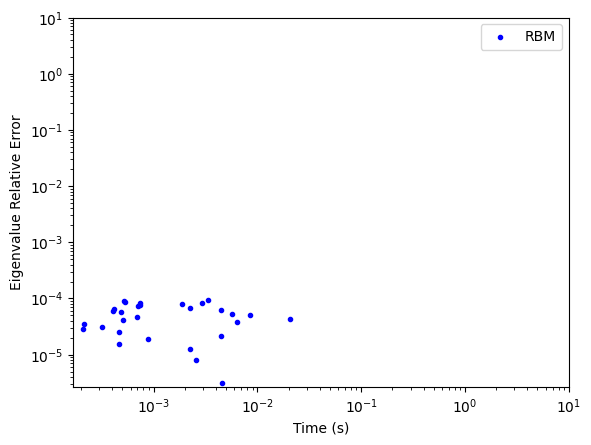

In [23]:
alphas = np.arange(0.5, 15.5, 0.5)
errors = []
times = []
for alpha in alphas:
  time, error = RBM(alpha, N)
  times.append(time)
  errors.append(error)

maxT = max(times) + 10
minT = min(times) - 10
maxEr = max(errors) + 10
minEr = min(errors) - 10

catFig, catAx = plt.subplots()

# Blue is RBM
catAx.scatter(times,errors,color='blue',
               marker='.',label='RBM')

catAx.set(xscale='log',yscale='log',
           xlabel='Time (s)',ylabel='Eigenvalue Relative Error',
           xlim=(minT, maxT),ylim=(minEr,maxEr))

plt.legend()
plt.show()